**Image Classification For Galaxy10**
<br>To implement Classification model, Here I used CNN. to categorize astronomical pictures using prebuilt models in Tensorflow.

1. First Importing all, required librarires.

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model
import numpy as np
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [4]:
import matplotlib.pyplot as plt

2. Loading data in images_data and labels_data. here im using kaggle environment. so, loading data is here will be according to it.
<br>(ps: change the code here according to your working environment for loading the data.)

In [5]:
images_data=np.load('/kaggle/input/images/images.npy', mmap_mode='r')
images_data.shape
labels_data=np.load('/kaggle/input/labels/labels.npy', mmap_mode='r')
labels_data.shape
print(labels_data)

[0 0 0 ... 9 9 9]


In [6]:
images_data.shape
images_data[0]

memmap([[[68, 19, 23],
         [58, 17, 33],
         [40, 16, 40],
         ...,
         [51, 46, 43],
         [40, 41, 33],
         [28, 38, 30]],

        [[61, 40, 37],
         [52, 43, 44],
         [29, 39, 41],
         ...,
         [28, 30, 42],
         [28, 32, 35],
         [33, 40, 33]],

        [[30, 31, 25],
         [24, 41, 33],
         [15, 45, 33],
         ...,
         [21, 35, 48],
         [25, 35, 45],
         [37, 41, 40]],

        ...,

        [[28, 32, 35],
         [27, 31, 32],
         [42, 44, 43],
         ...,
         [20, 37, 27],
         [19, 40, 21],
         [27, 50, 24]],

        [[22, 36, 37],
         [19, 29, 30],
         [33, 37, 38],
         ...,
         [17, 35, 35],
         [17, 35, 21],
         [26, 45, 17]],

        [[18, 39, 40],
         [14, 28, 29],
         [24, 30, 30],
         ...,
         [20, 35, 56],
         [27, 37, 36],
         [28, 36, 15]]], dtype=uint8)

3. Spliting the data into, <br>x_train(image training set)<br>Y_train(labels training set)<br>x_test(image test/validation set)<br>Y_test(labels test/validation set)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(images_data, labels_data, test_size=0.2, random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train[0]

(14188, 256, 256, 3)
(14188,)
(3548, 256, 256, 3)
(3548,)


array([[[ 0, 47, 43],
        [16, 42, 33],
        [41, 28, 20],
        ...,
        [35, 55, 20],
        [34, 31, 12],
        [44, 14, 22]],

       [[22, 52, 54],
        [24, 45, 40],
        [23, 19,  8],
        ...,
        [37, 36, 32],
        [27, 24, 15],
        [28, 24, 15]],

       [[22, 31, 40],
        [34, 45, 47],
        [26, 27, 21],
        ...,
        [44, 30, 53],
        [26, 30, 31],
        [17, 42, 20]],

       ...,

       [[31, 27, 50],
        [47, 47, 73],
        [39, 44, 63],
        ...,
        [22, 33, 35],
        [16, 25, 22],
        [23, 25, 12]],

       [[28, 36, 39],
        [38, 34, 51],
        [27, 18, 37],
        ...,
        [17, 36, 30],
        [25, 27, 26],
        [48, 33, 38]],

       [[21, 35,  9],
        [38, 30, 28],
        [45, 24, 39],
        ...,
        [17, 38, 21],
        [28, 23, 20],
        [57, 26, 42]]], dtype=uint8)

4. Using Data agumentation for decreasing overfitting, adding images with flipped,rotated and zoomed to increase the data set, as it decreases the overfitting problem.

In [8]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,256,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

5. Creating a model with adding layers, from starting with less complex to catch major details and increasing complex layers to catch small details. <br>Here using regularisation technique(dropout) to further decrease the problem of overfitting. 

In [9]:
num_classes = 10

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model.build(input_shape=(None,256, 256, 3))
weights, bias = model.layers[-1].weights

6. Compiling model by using "adam" optimizer and  Sparse Categorical Crossentropy loss function and taking note of metrics like accuracy of model. 

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

7. Finally training the model,<br> here i used changing learning rate for model to converge to minimum rather then fluctuating.<br> and a early stopping method to stop model training when model overfits or its performance decreases.

In [12]:
initial_learning_rate = 0.001

optimizer = Adam(learning_rate=initial_learning_rate)


def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=7, 
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/7
444/444 [==============================] - 739s 2s/step - loss: 1.8898 - accuracy: 0.3000 - val_loss: 1.7338 - val_accuracy: 0.3317 - lr: 0.0010
Epoch 2/7
444/444 [==============================] - 699s 2s/step - loss: 1.5293 - accuracy: 0.4372 - val_loss: 1.3669 - val_accuracy: 0.4975 - lr: 0.0010
Epoch 3/7
444/444 [==============================] - 695s 2s/step - loss: 1.3041 - accuracy: 0.5277 - val_loss: 1.2420 - val_accuracy: 0.5490 - lr: 0.0010
Epoch 4/7
444/444 [==============================] - 691s 2s/step - loss: 1.1756 - accuracy: 0.5814 - val_loss: 1.1537 - val_accuracy: 0.5902 - lr: 0.0010
Epoch 5/7
444/444 [==============================] - 685s 2s/step - loss: 1.1059 - accuracy: 0.6159 - val_loss: 1.1684 - val_accuracy: 0.6074 - lr: 0.0010
Epoch 6/7
444/444 [==============================] - 688s 2s/step - loss: 1.0467 - accuracy: 0.6386 - val_loss: 1.0361 - val_accuracy: 0.6519 - lr: 9.0484e-04
Epoch 7/7
444/444 [==============================] - 681s 2s/step 

8. plotting the results from model training

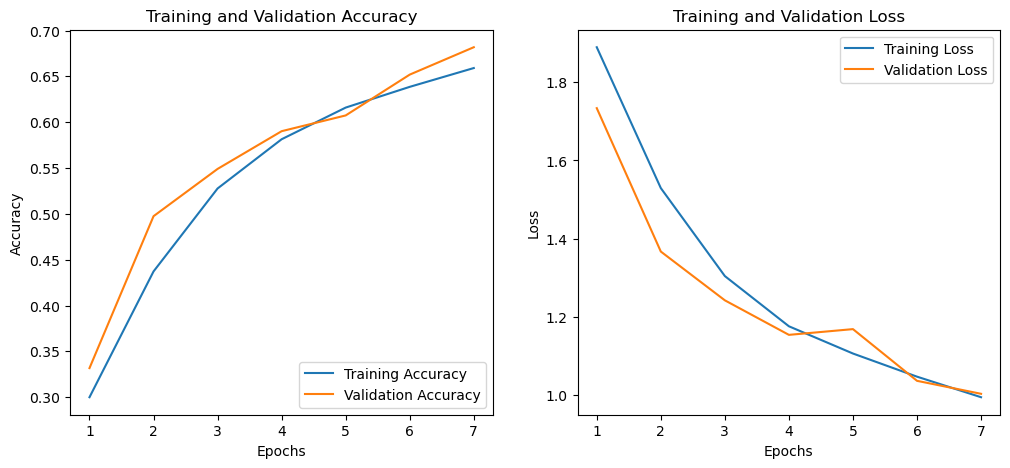

In [13]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()


9. Finally model evaluating by running it on test_data.

In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

111/111 - 39s - loss: 1.0029 - accuracy: 0.6818 - 39s/epoch - 352ms/step
0.6817925572395325
